In [398]:
#import standard data analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [399]:
df_batting = pd.read_csv('batter_features.csv')

In [400]:
#drop columns not used in the model
df_batting.drop(columns=['Unnamed: 0','primary_position','babip_batter_reg','popups_ratio_batter_reg','batter_avg_woba_reg','fly_balls_ratio_batter_reg','batter_avg_exp_b'], inplace=True)

In [401]:
#!pip install lazypredict
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [402]:
#account for shohei, change his position to unknown to avoid errors when training


In [403]:
X = df_batting.drop(columns='total_pa')
y = df_batting['total_pa']

In [404]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [405]:
# Scale features
numeric_cols = X_train.select_dtypes(include=np.number).columns

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [406]:
#convert categorical data
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [407]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split

# Initialize the ElasticNetCV model (with 10-fold cross-validation)
elastic_net = ElasticNetCV(cv=10, random_state=42, alphas=np.logspace(-4, 4, 100), 
                           l1_ratio=0.5, max_iter=10000, tol=1e-4)

# Fit the ElasticNetCV model to the training data
elastic_net.fit(X_train, y_train)

# Get the best alpha and L1 ratio from cross-validation
best_alpha = elastic_net.alpha_
best_l1_ratio = elastic_net.l1_ratio_
print(f"Best alpha: {best_alpha}")
print(f"Best L1 ratio: {best_l1_ratio}")

# Predict the target on the test set
y_pred = elastic_net.predict(X_test)

# Ensure that the predicted values are non-negative (e.g., for a count variable like 'PA')
y_pred = np.maximum(y_pred, 0)

# Calculate the RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate the R² score (coefficient of determination)
r2 = r2_score(y_test, y_pred)


# Ensure that the predicted values are non-negative (e.g., for a count variable like 'PA')
y_pred = np.maximum(y_pred, 0)

# Calculate the RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate the R² score (coefficient of determination)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Best alpha: 0.026560877829466867
Best L1 ratio: 0.5
Root Mean Squared Error (RMSE): 143.5126
R² Score: 0.6084


                          Feature  Coefficient  Abs_Coefficient
3                       total_pa_   117.257909       117.257909
0                             age  -108.805645       108.805645
2            avg_lineup_position_   -50.029107        50.029107
1                  years_after_28    46.498207        46.498207
5                         ops_reg    39.750277        39.750277
11   line_drives_ratio_batter_reg   -20.072128        20.072128
6               k_rate_batter_reg   -19.936847        19.936847
4             avg_lineup_position    16.794936        16.794936
9            batter_avg_xwoba_reg    14.394838        14.394838
12           hr_fb_pct_batter_reg   -13.237777        13.237777
14                         bats_R   -11.732678        11.732678
10  ground_balls_ratio_batter_reg   -11.058126        11.058126
8           batter_avg_exp_ba_reg    -5.815075         5.815075
13                         bats_L     5.203848         5.203848
7              bb_rate_batter_reg     0.

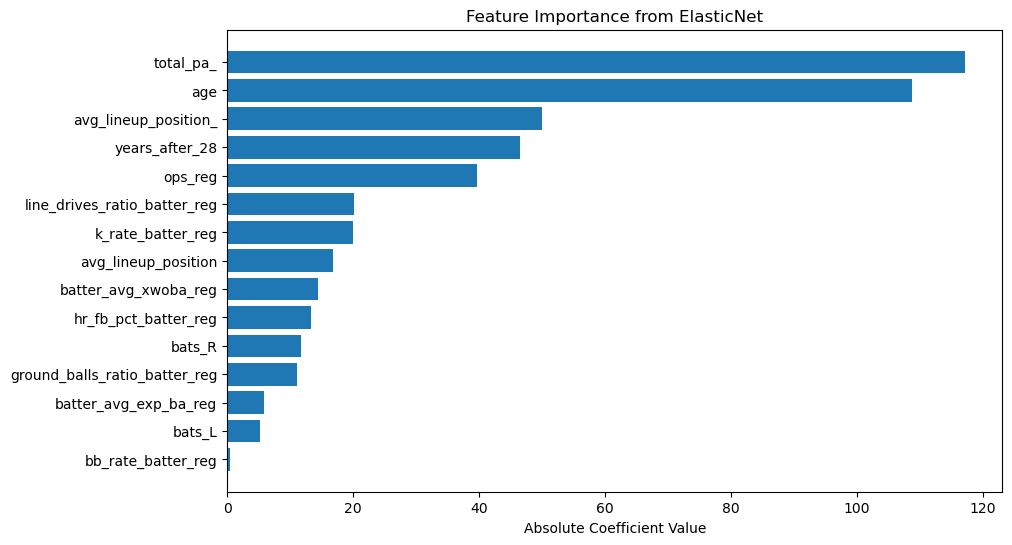

In [408]:
coefficients = elastic_net.coef_

# Create a DataFrame for the coefficients to associate with feature names
# After scaling, the feature names are lost, so we use the columns from X
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,  # Use the original feature names from X
    'Coefficient': coefficients
})

# Sort the features by the absolute value of the coefficients
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Print the feature importance
print(feature_importance)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Abs_Coefficient'])
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance from ElasticNet')
plt.gca().invert_yaxis()  # To show the most important feature at the top
plt.show()

In [409]:
print("\nActual vs Predicted Values:")
print(pd.DataFrame({"Actual": y_test, "Predicted": y_pred}).head(20))  # Show first 20 rows


Actual vs Predicted Values:
     Actual   Predicted
208   638.0  623.486342
259   440.0  149.314342
97    233.0  177.506057
148     0.0   12.197190
395   425.0  277.127525
485     0.0  410.657714
234     9.0  119.152499
181     0.0   65.012055
604   431.0  200.569528
367     0.0  183.654898
260   617.0  488.076835
368     0.0  139.657896
451     0.0   28.175396
396   329.0  102.695851
351   111.0  204.800164
77    421.0  341.125609
607     0.0    0.000000
420   455.0  253.943559
174   504.0  331.728734
741     6.0  134.328890


In [410]:
df_batting.loc[741]

total_pa                              6.0
age                                  23.0
years_after_28                        0.0
bats                                    L
avg_lineup_position_                7.875
total_pa_                          15.625
avg_lineup_position              5.906514
ops_reg                          0.408911
k_rate_batter_reg                0.272622
bb_rate_batter_reg               0.018906
batter_avg_exp_ba_reg            0.253619
batter_avg_xwoba_reg              0.26057
ground_balls_ratio_batter_reg    0.168174
line_drives_ratio_batter_reg     0.191803
hr_fb_pct_batter_reg             0.039008
Name: 741, dtype: object